In [11]:
import cv2
import os
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
print(os.getcwd())

C:\Users\amrik\Star RasPi\JupNoteBooks


In [9]:
model_path = 'CNNFingerAttempt3.h5'
model = load_model(model_path)
cam = cv2.VideoCapture(0)

while True:
    ret, frame = cam.read()

    if ret:
        x_start = 400
        y_start = 210
        box_w = 185
        box_h = 185
        roi = frame[y_start:y_start + box_h, x_start:x_start + box_w]

        # make ROI grayscale
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

        # gaussian blur 
        roi_blur = cv2.GaussianBlur(roi_gray, (5, 5), 0)

        # adaptive thresholding - Gaussian method
        roi_thresh = cv2.adaptiveThreshold(roi_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                           cv2.THRESH_BINARY, 11, 2)

        # invert thresholded image
        roi_thresh = cv2.bitwise_not(roi_thresh)

        # show ROI on frame
        cv2.rectangle(frame, (x_start, y_start), (x_start + box_w, y_start + box_h), (0, 0, 0), 2)
        cv2.imshow("Frame", frame)

        # caputre shot if P is pressed
        key = cv2.waitKey(1) & 0xFF
        if key == ord('p'):
            # resize the ROI to match the input size of model
            resized = cv2.resize(roi_thresh, (128, 128))  # Use your model's input size
            reshaped = np.expand_dims(resized, axis=-1)
            input_array = np.expand_dims(reshaped, axis=0) / 255.0

            # show img
            cv2.imshow("Processed Image", roi_thresh)
            
            # predict
            prediction = model.predict(input_array)
            predicted_class = np.argmax(prediction, axis=1)[0]

            # print the prediction
            print(f"Predicted fingers: {predicted_class}")

            # display the prediction
            cv2.putText(frame, f"Fingers: {predicted_class}", (x_start, y_start - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            cv2.imshow("Frame", frame)

        # break the loop if Q is pressed
        if key == ord('q'):
            break

cam.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted fingers: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted fingers: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted fingers: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted fingers: 2


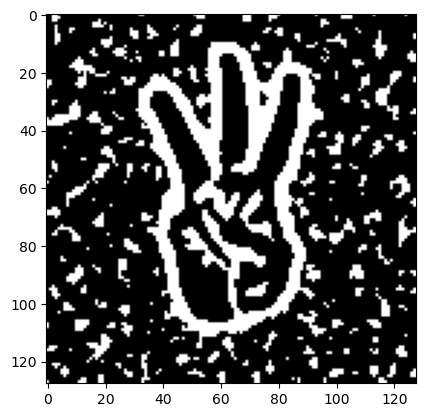

In [13]:
path = 'Ex_Files_Computer_Vision_Deep_Dive_in_Python/fingers/test/0027029b-4c3c-4785-bc1b-b8141331a108_3R.png'

# Read the image in grayscale mode
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Resize the image to match the input size expected by the model
img = cv2.resize(img, (128, 128))

img = cv2.GaussianBlur(img, (5, 5), 0)

        # Apply adaptive thresholding using Gaussian method
img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                           cv2.THRESH_BINARY, 11, 2)
img = cv2.bitwise_not(img)

plt.imshow(img, cmap = 'gray')